In [9]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [16]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

girumwondemagegn_network_intrusion_detection_data_path = kagglehub.dataset_download('girumwondemagegn/network-intrusion-detection-data')

print('Data source import complete.')


Data source import complete.


In [21]:
import os

for root, dirs, files in os.walk("/"):
    for file in files:
        if "KDD" in file or "kdd" in file:
            print(os.path.join(root, file))



/root/.cache/kagglehub/datasets/girumwondemagegn/network-intrusion-detection-data/versions/2/KDDTest.txt
/root/.cache/kagglehub/datasets/girumwondemagegn/network-intrusion-detection-data/versions/2/kddcup.data.corrected
/root/.cache/kagglehub/datasets/girumwondemagegn/network-intrusion-detection-data/versions/2/KDDTrain.txt
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_kddcup99.py
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/tests/test_kddcup99.py
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/descr/kddcup99.rst
/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/datasets/kddcup99/kddcup99_dataset_builder_test.py
/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/datasets/kddcup99/kddcup99_dataset_builder.py
/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/structured/kddcup99/kddcup99.py


# Import necessary libraries

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from google.colab import files
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

## Manually assign column names

In [46]:
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
    "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","level"
]

# Load the training dataset

In [45]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/girumwondemagegn/network-intrusion-detection-data/versions/2/KDDTrain.txt", names=columns)
Test_df = pd.read_csv("/root/.cache/kagglehub/datasets/girumwondemagegn/network-intrusion-detection-data/versions/2/KDDTest.txt", names=columns)

# Display the first few rows of the dataframe

In [48]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [49]:
df.shape

(125973, 43)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# Define feature and target variables

In [52]:
# Split the features and target variables
# 'attack' is the main classification target and 'level' is also a label that
X = df.drop(columns=["attack", "level"], errors='ignore')  # features
y = df["attack"].str.replace('.', '', regex=False)  # target variable (cleaned attack labels)

# Separate categorical and numerical columns

In [53]:
# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['protocol_type', 'service', 'flag']
Numerical columns: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


# Split the data into training and testing sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor for categorical and numerical columns

In [57]:
# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Apply transformers to their respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ]
)



---



---



# Train a Random Forest classifier

In [58]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

print("--- Random Forest Multi-Class Classifier ---")
y_pred_rf = rf_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

--- Random Forest Multi-Class Classifier ---
Accuracy: 0.9979360984322286
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       1.00      0.33      0.50         9
   guess_passwd       1.00      0.91      0.95        11
           imap       1.00      1.00      1.00         1
        ipsweep       0.99      0.99      0.99       733
           land       0.00      0.00      0.00         3
       multihop       0.00      0.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.98      0.99      0.99       313
         normal       1.00      1.00      1.00     13422
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       1.00      0.99      1.00       573
        rootkit       0.00      0.00      0.00         1
          sat

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [65]:
print("Accuracy of RF model:", accuracy_score(y_test, y_pred_rf))

Accuracy of RF model: 0.9979360984322286


## Save the model using joblib

In [77]:

joblib.dump(rf_pipeline, "RF_Model.joblib")


['RF_Model.joblib']



---



---



# Train a Logistic Regression

### 1. Define the LR Pipeline

In [70]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'))
])

### 2. Train the Model

In [71]:
lr_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'num_root',
                                                   'num_file_creati...
                                                   'num_shells',
                                                   'num_access_files',
                                                   'num_outbound_cmds',
                                                   'is_host_login',
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count', ...])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42))])

### 3. Evaluate the Model

In [74]:
print("\n--- Logistic Regression Multi-Class Classifier ---")
y_pred_lr = lr_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression Multi-Class Classifier ---
Accuracy: 0.9912284183369716
                 precision    recall  f1-score   support

           back       0.97      0.98      0.98       185
buffer_overflow       1.00      0.22      0.36         9
   guess_passwd       0.83      0.91      0.87        11
           imap       0.50      1.00      0.67         1
        ipsweep       0.96      0.97      0.97       733
           land       0.60      1.00      0.75         3
     loadmodule       0.00      0.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.93      0.95      0.94       313
         normal       0.99      0.99      0.99     13422
           perl       0.50      1.00      0.67         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       0.99      1.00      1.00       573
        rootkit       0.00      0.00      0.00         1
      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### 4. Accuracy of Logistic Regression model

In [75]:
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred_lr))

Accuracy of Logistic Regression model: 0.9912284183369716


### 5. Save the LR Model

In [76]:
joblib.dump(lr_pipeline, "LR_Model.joblib")

['LR_Model.joblib']

-------------

---



# Train an XGBoost classifier

### 1. Creare a XGBost Pipeline

In [82]:
# Encode string labels (e.g., 'normal', 'neptune', etc.) into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a pipeline with preprocessing and XGBoost classifier
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Applies scaling and encoding to features
    ("classifier", XGBClassifier(
        eval_metric='mlogloss',      # Metric to evaluate performance
        random_state=42,             # For reproducibility
        n_estimators=100,            # Number of trees
        learning_rate=0.1,           # Step size shrinkage
        max_depth=6,                 # Max depth of each tree
        use_label_encoder=False      # Avoids deprecation warning in newer XGBoost versions
    ))
])

# Train the pipeline on the encoded labels
xgb_pipeline.fit(X_train, y_train_encoded)

# Predict using the trained pipeline
y_pred_encoded = xgb_pipeline.predict(X_test)

# Convert numeric predictions back to original string labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [83]:
print("\n--- XGBoost Multi-Class Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


--- XGBoost Multi-Class Classifier ---
Accuracy: 0.9979757888469935
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       1.00      0.22      0.36         9
      ftp_write       0.00      0.00      0.00         0
   guess_passwd       1.00      0.91      0.95        11
           imap       0.25      1.00      0.40         1
        ipsweep       0.99      0.99      0.99       733
           land       0.50      0.67      0.57         3
     loadmodule       0.00      0.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.99      0.99      0.99       313
         normal       1.00      1.00      1.00     13422
           perl       0.50      1.00      0.67         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       1.00      0.99      0.99       573
        rootkit   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### XGBoost Model Accuracy

In [88]:
print("Accuracy XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))

Accuracy XGBoost Model Accuracy: 0.9979757888469935


### Save the XGBoost Pipeline + LabelEncoder

In [89]:
joblib.dump({"model": xgb_pipeline, "label_encoder": label_encoder},"XGB_Model.joblib")

['XGB_Model.joblib']



---



---



# Train a LightGBM classifier

In [91]:
# Create LightGBM pipeline with preprocessing and classifier
lgbm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(random_state=42, verbose=-1))  # verbose=-1 silences logs
])

# Train the pipeline
lgbm_pipeline.fit(X_train, y_train)
y_pred_lgbm = lgbm_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Evaluate the model

In [92]:
# Evaluate the model
print("\n--- LightGBM Multi-Class Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm, zero_division=0))


--- LightGBM Multi-Class Classifier ---
Accuracy: 0.7701131176820798
                 precision    recall  f1-score   support

           back       0.00      0.00      0.00       185
buffer_overflow       0.00      0.00      0.00         9
      ftp_write       0.00      0.00      0.00         0
   guess_passwd       0.00      0.00      0.00        11
           imap       0.00      0.00      0.00         1
        ipsweep       0.05      0.00      0.01       733
           land       0.00      0.00      0.00         3
     loadmodule       0.00      0.00      0.00         0
        neptune       0.96      0.98      0.97      8228
           nmap       0.17      0.51      0.25       313
         normal       0.95      0.80      0.87     13422
           perl       0.00      0.00      0.00         1
            phf       0.00      0.00      0.00         1
            pod       0.00      0.00      0.00        43
      portsweep       0.68      0.09      0.16       573
        rootkit  

### Accuracy LightGBM model

In [94]:
print("Accuracy LightGBM model:", accuracy_score(y_test, y_pred_lgbm))

Accuracy LightGBM model: 0.7701131176820798


# Save the LightGBM model using joblib

In [95]:
joblib.dump(lgbm_pipeline, "LGBM_Model.joblib")

['LGBM_Model.joblib']



---



---



In [99]:
import os
import joblib
import zipfile
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Step 1: Compare Accuracy
accuracy_data = {
    "Model": ["Random Forest", "Logistic Regression", "XGBoost", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgbm)
    ]
}
accuracy_df = pd.DataFrame(accuracy_data)
print("\n Model Accuracy Comparison:\n", accuracy_df)


 Model Accuracy Comparison:
                  Model  Accuracy
0        Random Forest  0.997936
1  Logistic Regression  0.991228
2              XGBoost  0.997976
3             LightGBM  0.770113


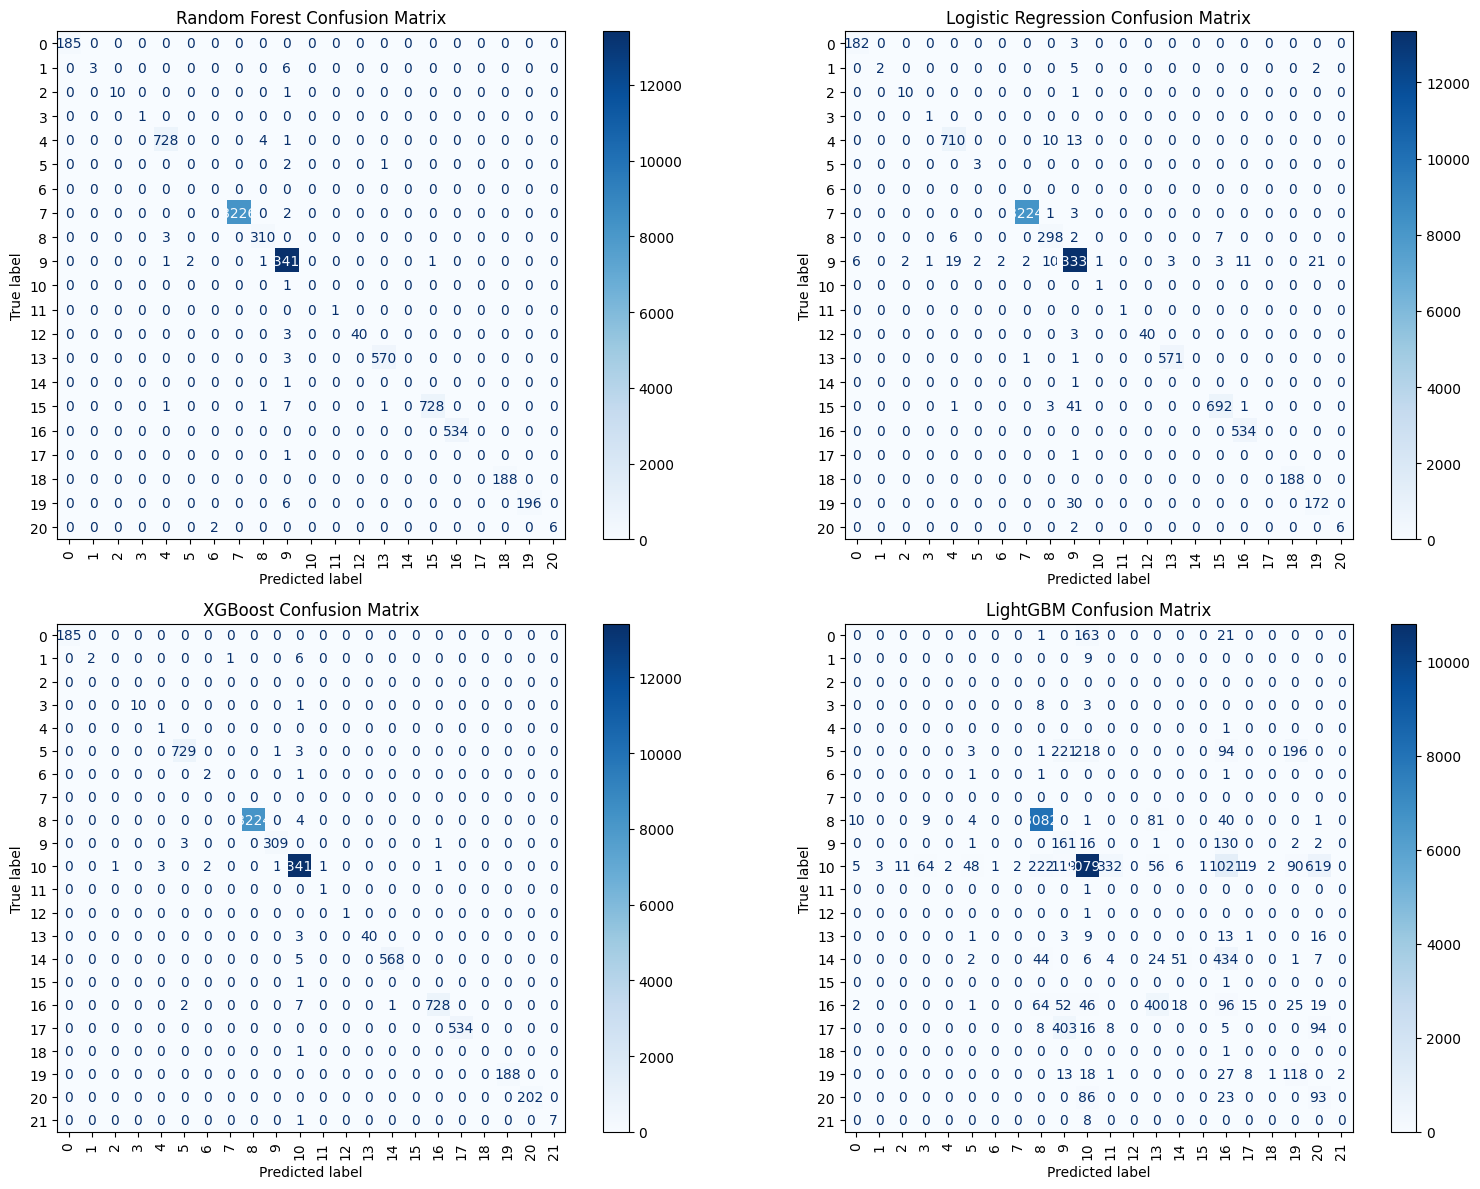

In [97]:
# Step 2: Plot Confusion Matrices
model_preds = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(model_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], xticks_rotation='vertical', cmap="Blues")
    axes[i].set_title(f"{model_name} Confusion Matrix")

plt.tight_layout()
plt.show()


In [98]:
# Step 3: Save Models
os.makedirs("saved_models", exist_ok=True)
joblib.dump(rf_pipeline, "saved_models/RF_Model.joblib")
joblib.dump(lr_pipeline, "saved_models/LR_Model.joblib")
joblib.dump({"model": xgb_pipeline, "label_encoder": label_encoder}, "saved_models/XGB_Model_With_Encoder.joblib")
joblib.dump(lgbm_pipeline, "saved_models/LGBM_Model.joblib")

# Step 4: Zip Folder
zip_filename = "model_collection.zip"
with zipfile.ZipFile(zip_filename, "w") as zipf:
    for root, _, files in os.walk("saved_models"):
        for file in files:
            filepath = os.path.join(root, file)
            zipf.write(filepath, os.path.relpath(filepath, "saved_models"))

# Step 5: Download
from google.colab import files
files.download("model_collection.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>